In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Call the USGS turbine database API

## Add the response to a DataFrame

In [2]:
base_url="https://eersc.usgs.gov/api/uswtdb/v1/turbines"

In [3]:
response = requests.get(base_url).json()

In [4]:
df = pd.DataFrame(response)
df

,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,...,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year
0,3001247,None,None,5115.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36819,35.07579,52161.0,0,NaN
1,3009410,None,None,5116.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36809,35.07589,52161.0,0,NaN
2,3072670,None,None,5112.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36841,35.07554,52161.0,0,NaN
3,3072663,None,None,5114.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36820,35.07570,52161.0,0,NaN
4,3072661,None,None,5149.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36376,35.07791,52161.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68787,3108971,None,2020-WTW-3724-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2021.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.29768,27.09550,NaN,0,NaN
68788,3109386,None,2020-WTW-3723-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2020.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.28698,27.09672,NaN,0,NaN
68789,3106411,48-174404,2019-WTW-10988-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2020.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.28335,27.15668,NaN,0,NaN
68790,3109758,None,2019-WTW-10984-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2020.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.32201,27.12558,NaN,0,NaN


# Remove irrelevant columns for analysis

In [5]:
df.keys()

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 't_state', 't_county',
       't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu', 't_model',
       't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr', 't_conf_loc',
       't_img_date', 't_img_srce', 'xlong', 'ylat', 'eia_id', 'retrofit',
       'retrofit_year'],
      dtype='object')

In [6]:
df = df.drop(columns=['case_id','faa_ors','faa_asn','usgs_pr_id','t_fips','t_rsa','t_cap','t_ttlh','t_conf_atr', 't_conf_loc','t_img_date', 't_img_srce','eia_id', 'retrofit','retrofit_year'])

In [7]:
df = df.rename(columns={'t_state':'State','t_county':'County','p_name':'Wind Farm Name','p_year': 'Year',
                       'p_tnum':'Turbine Count','p_cap':'WF Total MW','t_manu':'Turbine Manufacturer',
                       't_model':'Turbine Model','t_hh': 'Turbine Hub Height','t_rd':'Rotor Diameter','xlong':'lng','ylat':'lat'})

In [8]:
df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat
0,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36819,35.07579
1,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36809,35.07589
2,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36841,35.07554
3,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36820,35.07570
4,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36376,35.07791
...,...,...,...,...,...,...,...,...,...,...,...,...
68787,TX,Zapata County,unknown Zapata County,2021.0,41,NaN,None,None,NaN,NaN,-99.29768,27.09550
68788,TX,Zapata County,unknown Zapata County,2020.0,41,NaN,None,None,NaN,NaN,-99.28698,27.09672
68789,TX,Zapata County,unknown Zapata County,2020.0,41,NaN,None,None,NaN,NaN,-99.28335,27.15668
68790,TX,Zapata County,unknown Zapata County,2020.0,41,NaN,None,None,NaN,NaN,-99.32201,27.12558


In [9]:
#Clean data frame for wind farms built from 2000 forward
modern_WF = df.loc[df['Year']>=2000.0]
modern_WF =modern_WF.reset_index(drop=True)
len(modern_WF['Wind Farm Name'].unique())

1574

In [10]:
#Clean unkown wind farm
duplicate_df=modern_WF.duplicated('Wind Farm Name')
modern_WF['Duplicated']=duplicate_df.values
index_value = modern_WF[modern_WF['Duplicated']==True].index

modern_WF_clean = modern_WF.drop(index=modern_WF.index[index_value])
modern_WF_clean

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
0,IA,Boone County,30 MW Iowa DG Portfolio,2017.0,10,30.00,Nordex,AW125/3000,87.5,125.0,-93.70042,41.97761,False
10,MA,Barnstable County,6th Space Warning Squadron,2013.0,2,3.36,GE Wind,GE1.68-82.5,80.0,82.5,-70.54180,41.75249,False
12,MA,Barnstable County,AFCEE MMR Turbines,2011.0,2,3.00,GE Wind,GE1.5-77,80.0,77.0,-70.54530,41.75759,False
14,IA,Story County,AG Land 1,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.32569,42.20639,False
15,IA,Story County,AG Land 2,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.42809,42.14609,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63151,TX,Wilbarger County,unknown Wilbarger County,2018.0,6,NaN,None,None,NaN,NaN,-99.41830,34.28581,False
63390,NY,Wyoming County,unknown Wyoming County,2016.0,1,NaN,None,None,NaN,NaN,-78.18794,42.74082,False
63391,TX,Young County,unknown Young County 1,2011.0,1,NaN,None,None,NaN,NaN,-98.55109,33.09329,False
63392,CO,Yuma County,unknown Yuma County,2016.0,2,NaN,None,None,NaN,NaN,-102.71695,40.03755,False


In [11]:
#drop NA Total MW

modern_WF_MW = modern_WF_clean.dropna(subset=['WF Total MW'])
#modern_WF_MW.to_csv("wf.csv",
                  #encoding="utf-8", index=True, header=True)
modern_WF_MW

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
0,IA,Boone County,30 MW Iowa DG Portfolio,2017.0,10,30.00,Nordex,AW125/3000,87.5,125.0,-93.70042,41.97761,False
10,MA,Barnstable County,6th Space Warning Squadron,2013.0,2,3.36,GE Wind,GE1.68-82.5,80.0,82.5,-70.54180,41.75249,False
12,MA,Barnstable County,AFCEE MMR Turbines,2011.0,2,3.00,GE Wind,GE1.5-77,80.0,77.0,-70.54530,41.75759,False
14,IA,Story County,AG Land 1,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.32569,42.20639,False
15,IA,Story County,AG Land 2,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.42809,42.14609,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61213,OH,Hancock County,Zephyr Wind Project 2.0,2019.0,3,4.50,Goldwind,GW87,80.0,87.0,-83.63660,41.08840,False
61216,NY,Ontario County,Zotos,2011.0,2,3.30,Hyundai,HQ1650,70.0,82.0,-76.96765,42.88625,False
61221,VT,Addison County,unknown Addison County,2013.0,1,0.10,Northern Power Systems,NPS-100,37.0,21.0,-73.31070,44.00279,False
61935,TX,El Paso County,unknown El Paso County,2015.0,2,3.40,GE Wind,GE1.7-100,80.0,100.0,-106.40543,31.78812,False


# Plot wind farm installed capacity trends

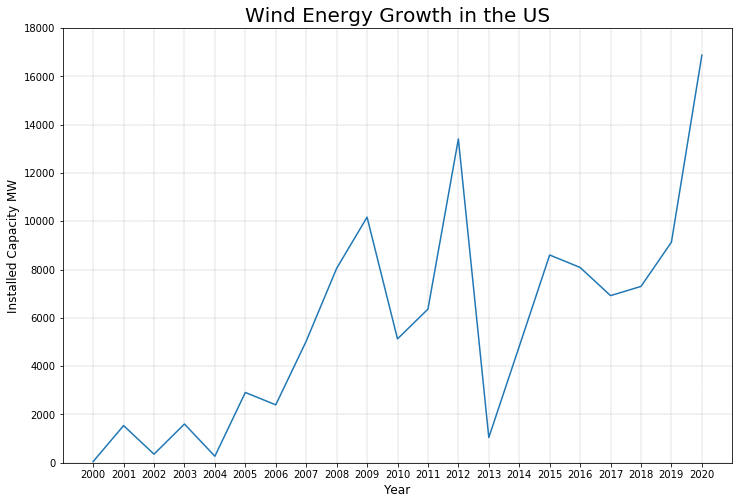

In [12]:
#INCLUDE IN BEGINNING OF PRESENTATION

WF_year = modern_WF_MW.groupby('Year')
MW_year = WF_year['WF Total MW'].sum()
x = MW_year.index
y = MW_year.values
plt.subplots(figsize=(12, 8))
plt.plot(x,y)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Installed Capacity MW',fontsize=12)
plt.title('Wind Energy Growth in the US',fontsize=20)
plt.ylim(0,18000)
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xticks(range(2000,2021))
plt.show()

# Plot wind farm installed capacity by state

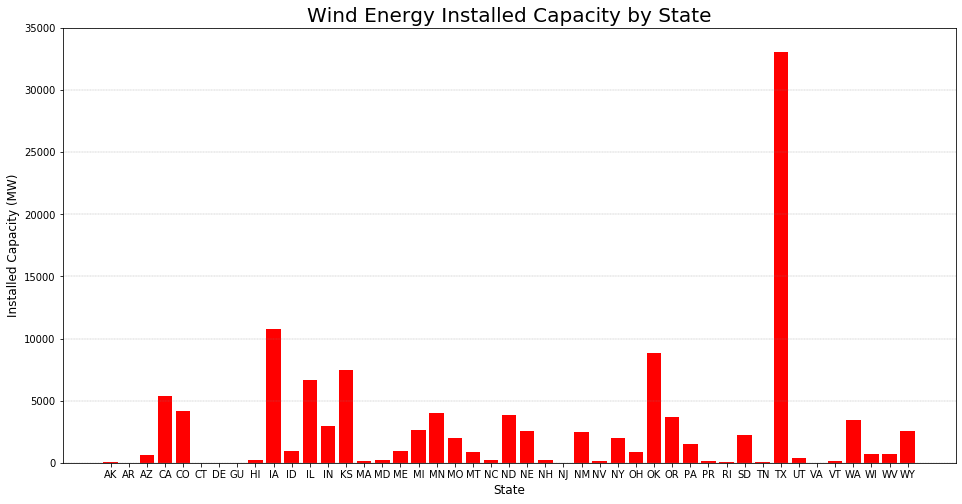

In [13]:
# INCLUDE IN BEGINNING OF PRESENTATION - SHOWING HOW WE DECIDED ON THE FOUR STATES WE USED FOR FURTHER ANALYSIS

WF_state = modern_WF_MW.groupby('State')
WF_state_MW = WF_state['WF Total MW'].sum()
x = WF_state_MW.index
y = WF_state_MW.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color='r')
plt.xlabel('State',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by State',fontsize=20)
plt.ylim(0,35000)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

* I DON'T THINK WE NEED THIS DATA INCLUDED IN PRESENTATION *

coords = []
cities = []
       
#Generate a random list of 500+ cities
lat = modern_WF_MW['lat']
lng = modern_WF_MW['lng']
coords = list(zip(lat,lng))

for coord in coords:
    cityname = citipy.nearest_city(float(coord[0]), float(coord[1])).city_name
    cities.append(cityname)

* I DON'T THINK WE NEED THIS DATA INCLUDED IN PRESENTATION *

modern_WF_MW = modern_WF_MW.drop(columns=['Duplicated'])
modern_WF_MW['City'] = cities

# Average turbine height trends

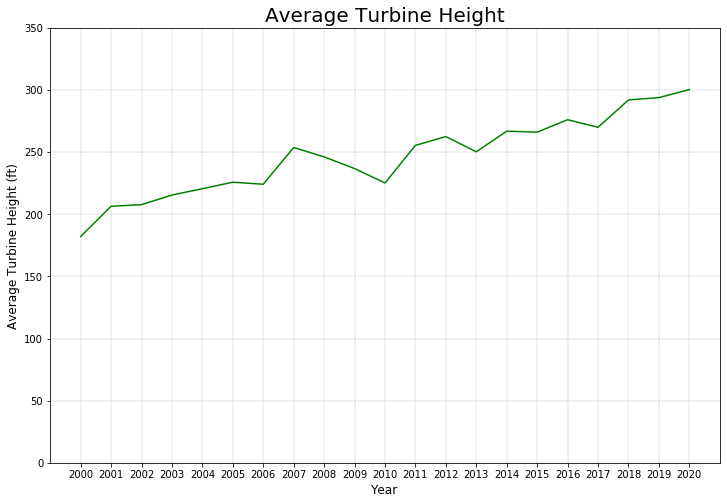

In [14]:
# THESE GRAPHS COULD BE USED IN PRESENTATION TO SHOW HOW WIND TURBINES ARE BECOMING MORE POWERFUL OVER TIME
# BUT THEY AREN'T COMPLETELY NECESSARY TO BE USED

height_year = modern_WF_MW.groupby('Year')
height_year = (height_year['Turbine Hub Height'].mean()) * 3.28084
x = height_year.index
y = height_year.values
plt.subplots(figsize=(12, 8))
plt.plot(x,y,color='g')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Turbine Height (ft)',fontsize=12)
plt.title('Average Turbine Height',fontsize=20)
plt.ylim(0,350)
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xticks(range(2000,2021))
plt.show()

# Average rotor diameter trends

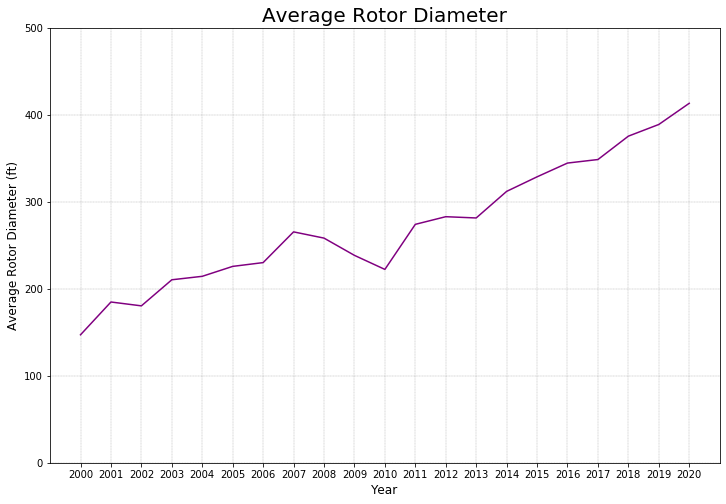

In [15]:
# THESE GRAPHS COULD BE USED IN PRESENTATION TO SHOW HOW WIND TURBINES ARE BECOMING MORE POWERFUL OVER TIME
# BUT THEY AREN'T COMPLETELY NECESSARY TO BE USED

diameter_year = modern_WF_MW.groupby('Year')
diameter_year = (diameter_year['Rotor Diameter'].mean()) * 3.28084
x = diameter_year.index
y = diameter_year.values
plt.subplots(figsize=(12, 8))
plt.plot(x,y,color='purple')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Rotor Diameter (ft)',fontsize=12)
plt.title('Average Rotor Diameter',fontsize=20)
plt.ylim(0,500)
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xticks(range(2000,2021))
plt.show()

* SINCE WE AREN'T INCLUDING CALIFORNIA IN ANALYSIS, WE SHOULD OMIT THIS FROM PRESENTATION *

state_county = modern_WF_MW.groupby(['State','County'])
county_MW = state_county['WF Total MW'].sum()


county_max_MW= county_MW.idxmax()
max_MW = county_MW.max()

print(f'{county_max_MW[1]} in {county_max_MW[0]} is the county with the maximum installed MW in the country, with a total of {max_MW} MW.' )

# Iowa Plots

In [16]:
# create df for iowa

iowa_df = modern_WF_MW.loc[(modern_WF_MW['State']=='IA')]
iowa_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
0,IA,Boone County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,87.5,125.0,-93.70042,41.97761,False
14,IA,Story County,AG Land 1,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.32569,42.20639,False
15,IA,Story County,AG Land 2,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.42809,42.14609,False
16,IA,Story County,AG Land 3,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.43199,42.14559,False
17,IA,Story County,AG Land 4,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.35490,41.90419,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60534,IA,Worth County,Wind Walkers,2011.0,1,1.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.22149,43.38469,False
60802,IA,Winnebago County,Winnebago I,2008.0,10,20.0,Gamesa,G83-2.0,78.0,83.0,-93.78389,43.31819,False
60814,IA,Cass County,Wiota Wind,2012.0,1,1.6,GE Wind,GE1.6-82.5,80.0,82.5,-94.87679,41.39150,False
60897,IA,Adair County,Wolverine,2010.0,1,1.5,GE Wind,GE1.5-77,80.0,77.0,-94.44479,41.39309,False


In [17]:
# eliminating unnecessary columns

current_ia_df = iowa_df[["County", "Year", "WF Total MW", "Wind Farm Name"]]
current_ia_df

,County,Year,WF Total MW,Wind Farm Name
0,Boone County,2017.0,30.0,30 MW Iowa DG Portfolio
14,Story County,2012.0,9.6,AG Land 1
15,Story County,2012.0,9.6,AG Land 2
16,Story County,2012.0,9.6,AG Land 3
17,Story County,2012.0,9.6,AG Land 4
...,...,...,...,...
60534,Worth County,2011.0,1.6,Wind Walkers
60802,Winnebago County,2008.0,20.0,Winnebago I
60814,Cass County,2012.0,1.6,Wiota Wind
60897,Adair County,2010.0,1.5,Wolverine


In [18]:
# grouping by county and year to get total sum of MW per county per year (this will make graphing and correlation easier)

current_ia_df_grouped = current_ia_df.groupby(['County', 'Year']).sum()

current_ia_df_grouped = current_ia_df_grouped.reset_index()
current_ia_df_grouped

,County,Year,WF Total MW
0,Adair County,2005.0,0.66
1,Adair County,2008.0,174.80
2,Adair County,2010.0,3.00
3,Adair County,2012.0,109.28
4,Adair County,2015.0,1.85
...,...,...,...
104,Winneshiek County,2011.0,1.60
105,Worth County,2001.0,80.10
106,Worth County,2008.0,109.70
107,Worth County,2009.0,160.00


In [19]:
# pull in population and unemployment csv file

csv_path = "popn_and_unemployment.csv"
census_df = pd.read_csv(csv_path, encoding="utf-8")
census_df

,State,County,Year,Population,Unemployment Rate,2019 Median Income
0,OK,Oklahoma,2000,"3,454,365",3.0,NaN
1,OK,Adair County,2000,"21,031",2.6,NaN
2,OK,Alfalfa County,2000,"6,080",2.9,NaN
3,OK,Atoka County,2000,"13,820",3.6,NaN
4,OK,Beaver County,2000,"5,782",2.4,NaN
...,...,...,...,...,...,...
9355,IA,Winnebago County,2019,10354,5.7,59510.0
9356,IA,Winneshiek County,2019,19991,2.9,65482.0
9357,IA,Woodbury County,2019,103107,2.7,58419.0
9358,IA,Worth County,2019,7381,3.9,43142.0


In [20]:
# delete unnecessary column

census_df = census_df[["State", "County", "Year", "Population", "Unemployment Rate"]]
census_df

,State,County,Year,Population,Unemployment Rate
0,OK,Oklahoma,2000,"3,454,365",3.0
1,OK,Adair County,2000,"21,031",2.6
2,OK,Alfalfa County,2000,"6,080",2.9
3,OK,Atoka County,2000,"13,820",3.6
4,OK,Beaver County,2000,"5,782",2.4
...,...,...,...,...,...
9355,IA,Winnebago County,2019,10354,5.7
9356,IA,Winneshiek County,2019,19991,2.9
9357,IA,Woodbury County,2019,103107,2.7
9358,IA,Worth County,2019,7381,3.9


In [21]:
# filter out only iowa info

iowa_census = census_df[census_df["State"] == "IA"]
iowa_census

,State,County,Year,Population,Unemployment Rate
78,IA,Adair County,2000,"8,223",2.6
79,IA,Adams County,2000,"4,476",2.8
80,IA,Allamakee County,2000,"14,674",3.4
81,IA,Appanoose County,2000,"13,696",4.3
82,IA,Audubon County,2000,"6,804",2.9
...,...,...,...,...,...
9355,IA,Winnebago County,2019,10354,5.7
9356,IA,Winneshiek County,2019,19991,2.9
9357,IA,Woodbury County,2019,103107,2.7
9358,IA,Worth County,2019,7381,3.9


In [22]:
# merge iowa df with census df - THIS IS OUR FINAL IOWA DATAFRAME - WILL BE USED IN GRAPH ANALYSIS

iowa_df = pd.merge(current_ia_df_grouped, iowa_census, on=["County", "Year"], how="left")
iowa_df

,County,Year,WF Total MW,State,Population,Unemployment Rate
0,Adair County,2005.0,0.66,IA,"7,932",4.0
1,Adair County,2008.0,174.80,IA,"7,747",4.1
2,Adair County,2010.0,3.00,IA,7682,5.5
3,Adair County,2012.0,109.28,IA,7468,4.4
4,Adair County,2015.0,1.85,IA,7145,3.2
...,...,...,...,...,...,...
104,Winneshiek County,2011.0,1.60,IA,21051,5.0
105,Worth County,2001.0,80.10,IA,"7,797",5.1
106,Worth County,2008.0,109.70,IA,"7,632",6.7
107,Worth County,2009.0,160.00,IA,"7,610",10.1


ConversionError: Failed to convert value(s) to axis units: array([               County    Year  WF Total MW State Population  Unemployment Rate
11      Bremer County  2001.0          0.9    IA     23,506                3.1
31   Dickinson County  2001.0          1.0    IA     16,477                3.3
105      Worth County  2001.0         80.1    IA      7,797                5.1,
                  County    Year  WF Total MW State Population  Unemployment Rate
53  Hardin County  2002.0         0.75    IA     18,476                7.4,
                     County    Year  WF Total MW State Population  Unemployment Rate
32  Dickinson County  2003.0        43.50    IA     16,339                4.7
74    Osceola County  2003.0         0.66    IA      6,888                5.5
87        Sac County  2003.0         0.66    IA     10,967                4.1
96     Taylor County  2003.0         0.75    IA      6,747                6.8,
                       County    Year  WF Total MW State Population  \
15  Buena Vista County  2004.0        160.5    IA     20,000   
35        Emmet County  2004.0          1.5    IA     10,553   

    Unemployment Rate  
15                3.9  
35                4.5  ,
                    County    Year  WF Total MW State Population  Unemployment Rate
0      Adair County  2005.0         0.66    IA      7,932                4.0
36     Emmet County  2005.0         1.65    IA     10,527                4.4
50  Hamilton County  2005.0       185.00    IA     16,261                4.1
88       Sac County  2005.0        15.00    IA     10,716                3.9,
                   County    Year  WF Total MW State Population  Unemployment Rate
16  Carroll County  2006.0        99.00    IA     20,832                4.3
39    Floyd County  2006.0         0.45    IA     16,586                4.5,
                      County    Year  WF Total MW State Population  Unemployment Rate
26        Clay County  2007.0        21.00    IA     16,725                5.5
44      Greene County  2007.0        14.70    IA      9,548                6.4
79  Pocahontas County  2007.0       196.50    IA      7,667                3.2
83        Polk County  2007.0         0.66    IA    413,024                4.9,
                          County    Year  WF Total MW State Population  \
1            Adair County  2008.0        174.8    IA      7,747   
17         Carroll County  2008.0        150.0    IA     20,742   
40           Floyd County  2008.0         75.0    IA     16,331   
52         Hancock County  2008.0        150.0    IA     11,525   
68        Mitchell County  2008.0        198.9    IA     10,815   
75         Osceola County  2008.0        125.0    IA      6,617   
80      Pocahontas County  2008.0         58.5    IA      7,510   
84   Pottawattamie County  2008.0        153.0    IA     91,781   
90           Story County  2008.0        150.0    IA     87,831   
101      Winnebago County  2008.0        210.0    IA     10,927   
106          Worth County  2008.0        109.7    IA      7,632   

     Unemployment Rate  
1                  4.1  
17                 4.5  
40                 6.5  
52                13.0  
68                 6.8  
75                 6.5  
80                 3.2  
84                 4.3  
90                 3.2  
101                8.4  
106                6.7  ,
                      County    Year  WF Total MW State Population  Unemployment Rate
12      Bremer County  2009.0         0.95    IA     24,183                5.4
33   Dickinson County  2009.0       111.15    IA     16,666                7.1
41    Franklin County  2009.0       199.65    IA     10,656               13.4
55      Howard County  2009.0        99.00    IA      9,568                8.0
60     Kossuth County  2009.0        10.50    IA     15,630                5.9
69    Mitchell County  2009.0        72.45    IA     10,763               10.0
91       Story County  2009.0       150.90    IA     89,285                4.7
102  Winnebago County  2009.0        66.00    IA     10,917               15.0
107      Worth County  2009.0       160.00    IA      7,610               10.1,
                    County    Year  WF Total MW State Population  Unemployment Rate
2      Adair County  2010.0          3.0    IA       7682                5.5
14  Buchanan County  2010.0          0.1    IA      20958                6.0
76   Osceola County  2010.0          2.0    IA       6462               12.5,
                       County    Year  WF Total MW State Population  \
29     Delaware County  2011.0         42.5    IA      17632   
54        Henry County  2011.0          1.5    IA      20243   
66     Marshall County  2011.0        119.6    IA      41013   
70     Mitchell County  2011.0          1.5    IA      10709   
81   Pocahontas County  2011.0         29.9    IA       7204   
92        Story County  2011.0          1.5    IA      91136   
94         Tama County  2011.0          1.5    IA      17614   
104  Winneshiek County  2011.0          1.6    IA      21051   
108       Worth County  2011.0          3.2    IA       7561   

     Unemployment Rate  
29                10.2  
54                 9.7  
66                 9.4  
70                10.0  
81                 4.4  
92                 3.9  
94                 6.1  
104                5.0  
108               11.5  ,
                      County    Year  WF Total MW State Population  Unemployment Rate
3        Adair County  2012.0       109.28    IA       7468                4.4
13      Bremer County  2012.0         0.90    IA      24496                3.8
19        Cass County  2012.0         1.60    IA      13700                8.5
22       Cedar County  2012.0         6.00    IA      18296                4.5
27    Crawford County  2012.0       100.00    IA      17299                8.0
37     Fayette County  2012.0        37.50    IA      20774                8.6
42    Franklin County  2012.0        99.00    IA      10509                8.4
45      Greene County  2012.0        58.00    IA       9181               13.6
49     Guthrie County  2012.0       200.10    IA      10762                5.6
51    Hamilton County  2012.0        19.20    IA      15321                8.9
62        Linn County  2012.0         2.50    IA     215485                5.2
82  Pocahontas County  2012.0        80.00    IA       7143                4.0
93       Story County  2012.0        42.40    IA      92003                3.6
95        Tama County  2012.0       105.75    IA      17501                6.0,
                    County    Year  WF Total MW State Population  Unemployment Rate
67  Marshall County  2013.0        44.65    IA      40995                6.8,
                    County    Year  WF Total MW State Population  Unemployment Rate
47    Grundy County  2014.0       140.76    IA      12390                8.8
63   Madison County  2014.0       119.65    IA      15616                6.2
100  Webster County  2014.0       251.02    IA      37069                8.7,
                   County    Year  WF Total MW State Population  Unemployment Rate
4     Adair County  2015.0         1.85    IA       7145                3.2
18  Carroll County  2015.0        20.00    IA      20423                4.6
72  O'Brien County  2015.0       502.05    IA      13926                2.8,
                   County    Year  WF Total MW State Population  Unemployment Rate
8     Adams County  2016.0       154.28    IA       3692                3.6
20     Cass County  2016.0         1.79    IA      13176                5.6
57      Ida County  2016.0       301.06    IA       6961                2.6
73  O'Brien County  2016.0       250.26    IA      13926                2.8,
                        County    Year  WF Total MW State Population  \
10         Boone County  2017.0       200.00    IA      26443   
21          Cass County  2017.0         1.79    IA      13144   
23   Cerro Gordo County  2017.0        10.00    IA      42999   
28        Dallas County  2017.0         6.00    IA      87208   
30      Delaware County  2017.0         6.00    IA      17143   
38       Fayette County  2017.0         6.00    IA      19687   
64       Mahaska County  2017.0       164.00    IA      22211   
97        Taylor County  2017.0         3.58    IA       6095   
103    Winnebago County  2017.0         0.10    IA      10573   

     Unemployment Rate  
10                 3.4  
21                 4.5  
23                 3.1  
28                 7.5  
30                 4.3  
38                 4.7  
64                 3.2  
97                 4.5  
103                6.5  ,
                     County    Year  WF Total MW State Population  Unemployment Rate
5       Adair County  2018.0       131.17    IA       7074                2.4
9     Audubon County  2018.0       103.50    IA       5471                2.5
46     Greene County  2018.0       170.00    IA       8965                6.6
48     Grundy County  2018.0        90.83    IA      12272                4.8
65    Mahaska County  2018.0         4.00    IA      22018                2.6
71   Mitchell County  2018.0       199.20    IA      10571                5.4
85  Poweshiek County  2018.0       200.00    IA      18467                2.4,
                     County    Year  WF Total MW State Population  Unemployment Rate
6       Adair County  2019.0       398.80    IA       7152                2.4
25   Cherokee County  2019.0       212.04    IA      11235                2.9
34  Dickinson County  2019.0       299.30    IA      17258                2.9
56     Howard County  2019.0        66.00    IA       9158                3.3
58        Ida County  2019.0       202.36    IA       6860                2.0
77  Palo Alto County  2019.0       250.00    IA       8886                2.2
86  Poweshiek County  2019.0       310.30    IA      18504                2.7,
                       County    Year  WF Total MW State Population  \
7         Adair County  2020.0        60.40   NaN        NaN   
24  Cerro Gordo County  2020.0       207.74   NaN        NaN   
43     Franklin County  2020.0       201.26   NaN        NaN   
59         Iowa County  2020.0       252.50   NaN        NaN   
61      Kossuth County  2020.0       352.02   NaN        NaN   
78    Palo Alto County  2020.0        90.00   NaN        NaN   
89          Sac County  2020.0       130.92   NaN        NaN   
98       Taylor County  2020.0       112.42   NaN        NaN   
99        Union County  2020.0       254.10   NaN        NaN   

    Unemployment Rate  
7                 NaN  
24                NaN  
43                NaN  
59                NaN  
61                NaN  
78                NaN  
89                NaN  
98                NaN  
99                NaN  ], dtype=object)

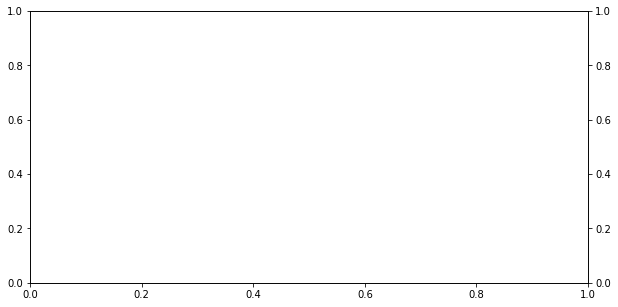

In [25]:
# scatter plot describing energy output over time in iowa
iowa
year = iowa_df.groupby(["Year"])
energy_output = year["WF Total MW"].sum()
unemployment_rate = year["Unemployment Rate"].sum() 

fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
ax1.plot(year, energy_output, "g-")
ax2.plot(year, unemployment_rate, "b-")

ax1.set_xlabel("Year")
ax1.set_ylabel("Energy Output in MW", color="g")
ax2.set_ylabel("Percent Unemployment Rate", color="b")

plt.show()

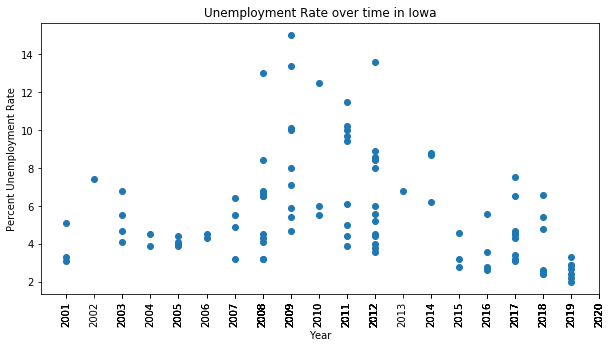

In [63]:
# scatter plot describing unemployment rate over time in iowa

year = iowa_df.iloc[:,1]
unemployment_rate = iowa_df.iloc[:,5]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, unemployment_rate)
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Percent Unemployment Rate")
plt.title("Unemployment Rate over time in Iowa")
plt.show()

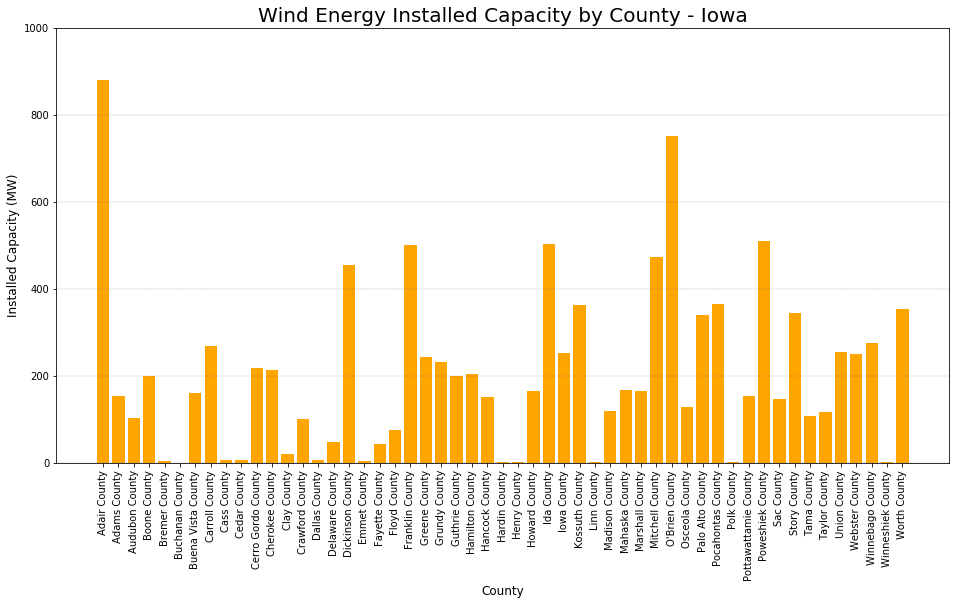

In [25]:
WF_IA = iowa_df.groupby('County')
WF_county_IA = WF_IA['WF Total MW'].sum()
x = WF_county_IA.index
y = WF_county_IA.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color='orange')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Iowa',fontsize=20)
plt.ylim(0,1000)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Oklahoma Plots

In [26]:
# create df for oklahoma

oklahoma_df = modern_WF_MW.loc[(modern_WF_MW['State']=='OK')]
oklahoma_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
1544,OK,Murray County,Arbuckle Mountain,2015.0,50,100.00,Vestas,V110-2.0,80.0,110.0,-97.19896,34.39424,False
1632,OK,Garfield County,Armadillo Flats,2018.0,126,247.28,GE Wind,GE1.79-100,80.0,100.0,-97.53968,36.27013,False
2440,OK,Beaver County,Balko Wind,2015.0,162,299.70,GE Wind,GE1.85-87,80.0,87.0,-100.80332,36.54136,False
3799,OK,Roger Mills County,Big Smile Wind Farm at Dempsey Ridge,2012.0,66,132.00,Gamesa,G90-2.0,78.0,90.0,-99.84719,35.53270,False
4891,OK,Kay County,Blackwell,2012.0,26,59.80,Siemens,SWT-2.3-108,80.0,108.0,-97.42510,36.86459,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55007,OK,Dewey County,Taloga,2011.0,54,129.60,Mitsubishi,MWT95/2.4,80.0,95.0,-98.93169,35.84679,False
55324,OK,Noble County,Thunder Ranch,2017.0,120,297.80,GE Wind,GE2.3-116,80.0,116.0,-97.30306,36.57061,False
58516,OK,Custer County,Weatherford Wind Energy Center,2005.0,71,106.50,GE Wind,GE1.5-77,80.0,77.0,-98.74320,35.49469,False
58588,OK,Washita County,Weatherford Wind Energy Center Expansion,2005.0,27,40.50,GE Wind,GE1.5-77,80.0,77.0,-98.65730,35.46230,False


In [27]:
# eliminating unnecessary columns

current_ok_df = oklahoma_df[["County", "Year", "WF Total MW", "Wind Farm Name"]]
current_ok_df

,County,Year,WF Total MW,Wind Farm Name
1544,Murray County,2015.0,100.00,Arbuckle Mountain
1632,Garfield County,2018.0,247.28,Armadillo Flats
2440,Beaver County,2015.0,299.70,Balko Wind
3799,Roger Mills County,2012.0,132.00,Big Smile Wind Farm at Dempsey Ridge
4891,Kay County,2012.0,59.80,Blackwell
...,...,...,...,...
55007,Dewey County,2011.0,129.60,Taloga
55324,Noble County,2017.0,297.80,Thunder Ranch
58516,Custer County,2005.0,106.50,Weatherford Wind Energy Center
58588,Washita County,2005.0,40.50,Weatherford Wind Energy Center Expansion


In [28]:
# grouping by county and year to get total sum of MW per county per year (this will make graphing and correlation easier)

current_ok_df_grouped = current_ok_df.groupby(['County', 'Year']).sum()

current_ok_df_grouped = current_ok_df_grouped.reset_index()
current_ok_df_grouped.head()

,County,Year,WF Total MW
0,Alfalfa County,2020.0,250.90
1,Beaver County,2015.0,299.70
2,Beaver County,2016.0,198.00
3,Beaver County,2020.0,203.57
4,Caddo County,2011.0,99.00


In [29]:
# pull oklahoma census

ok_census = census_df[census_df["State"] == "OK"]
ok_census

,State,County,Year,Population,Unemployment Rate
0,OK,Oklahoma,2000,"3,454,365",3.0
1,OK,Adair County,2000,"21,031",2.6
2,OK,Alfalfa County,2000,"6,080",2.9
3,OK,Atoka County,2000,"13,820",3.6
4,OK,Beaver County,2000,"5,782",2.4
...,...,...,...,...,...
9001,OK,Wagoner County,2019,81289,3.1
9002,OK,Washington County,2019,51527,4.6
9003,OK,Washita County,2019,10916,3.4
9004,OK,Woods County,2019,8793,2.1


In [30]:
# merge oklahoma df with census df - THIS IS OUR FINAL OKLAHOMA DATAFRAME - WILL BE USED IN GRAPH ANALYSIS

ok_df = pd.merge(current_ok_df_grouped, ok_census, on=["County", "Year"], how="left")
ok_df = ok_df.dropna(subset=["Unemployment Rate"])
ok_df.head()

,County,Year,WF Total MW,State,Population,Unemployment Rate
1,Beaver County,2015.0,299.70,OK,5455,2.7
2,Beaver County,2016.0,198.00,OK,5435,3.1
4,Caddo County,2011.0,99.00,OK,29602,7.1
5,Canadian County,2012.0,399.25,OK,122500,3.9
6,Canadian County,2018.0,129.88,OK,144426,2.8


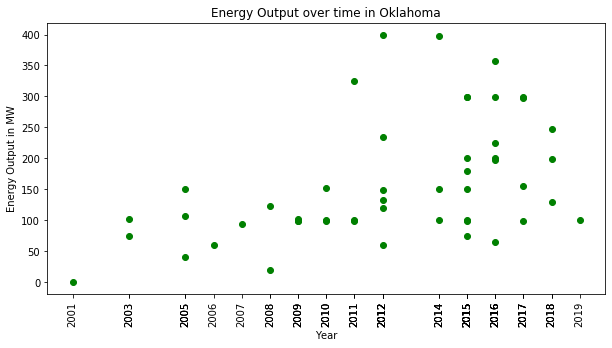

In [31]:
# scatter plot describing energy output over time in oklahoma

year = ok_df.iloc[:,1]
energy_output = ok_df.iloc[:,2]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, energy_output, color="green")
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Energy Output in MW")
plt.title("Energy Output over time in Oklahoma")
plt.show()

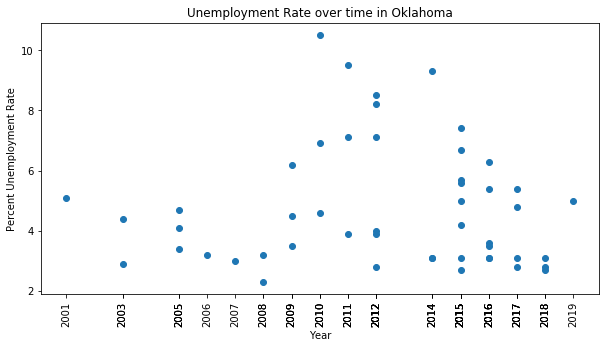

In [32]:
# scatter plot describing unemployment rate over time in oklahoma

year = ok_df.iloc[:,1]
unemployment_rate = ok_df.iloc[:,5]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, unemployment_rate)
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Percent Unemployment Rate")
plt.title("Unemployment Rate over time in Oklahoma")
plt.show()

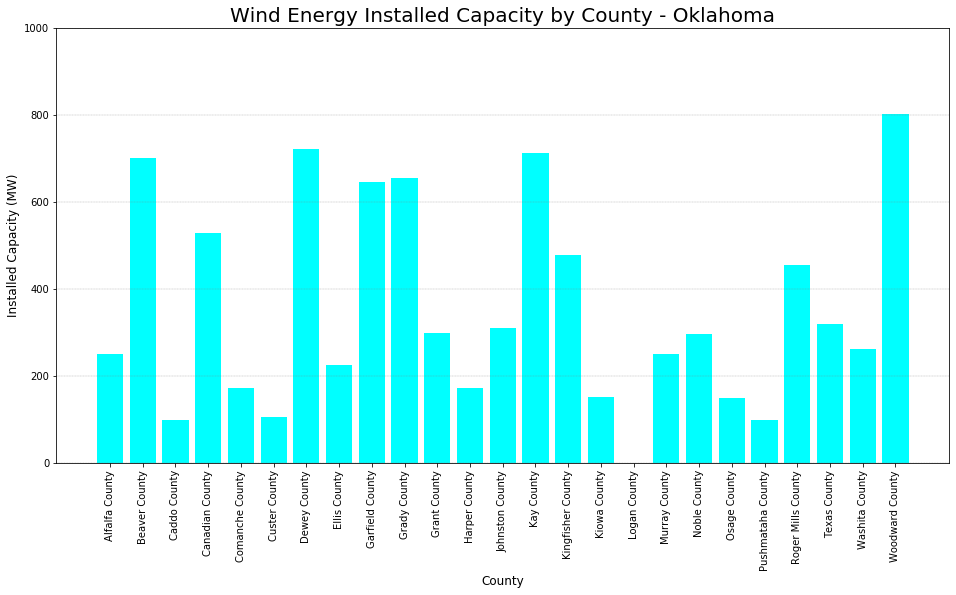

In [33]:
WF_OK = oklahoma_df.groupby('County')
WF_county_OK = WF_OK['WF Total MW'].sum()
x = WF_county_OK.index
y = WF_county_OK.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color='cyan')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Oklahoma',fontsize=20)
plt.ylim(0,1000)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Oregon plots

In [35]:
# create df for oregon

oregon_df = modern_WF_MW.loc[modern_WF_MW['State']=='OR']
oregon_df.head()

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
3224,OR,Baker County,Benson Creek,2017.0,5,10.0,GE Wind,GE2.0-116,80.0,116.0,-117.27673,44.42429,False
3904,OR,Sherman County,Biglow Canyon I,2007.0,76,125.4,Vestas,V82-1.65,80.0,82.0,-120.58518,45.66919,False
3980,OR,Sherman County,Biglow Canyon II,2009.0,65,149.5,Siemens,SWT-2.3-93,80.0,93.0,-120.59669,45.63350,False
4046,OR,Sherman County,Biglow Canyon III,2010.0,76,174.8,Siemens,SWT-2.3-93,80.0,93.0,-120.54809,45.64840,False
12516,OR,Umatilla County,Chopin,2016.0,6,9.9,GE Wind,GE1.7-103,80.0,103.0,-118.47427,45.89413,False


In [37]:
# eliminating unnecessary columns

current_or_df = oregon_df[["County", "Year", "WF Total MW", "Wind Farm Name"]]
current_or_df.head()

,County,Year,WF Total MW,Wind Farm Name
3224,Baker County,2017.0,10.0,Benson Creek
3904,Sherman County,2007.0,125.4,Biglow Canyon I
3980,Sherman County,2009.0,149.5,Biglow Canyon II
4046,Sherman County,2010.0,174.8,Biglow Canyon III
12516,Umatilla County,2016.0,9.9,Chopin


In [38]:
# grouping by county and year to get total sum of MW per county per year (this will make graphing and correlation easier)

current_or_df_grouped = current_or_df.groupby(['County', 'Year']).sum()

current_or_df_grouped = current_or_df_grouped.reset_index()
current_or_df_grouped.head()

,County,Year,WF Total MW
0,Baker County,2011.0,3.0
1,Baker County,2017.0,50.0
2,Gilliam County,2001.0,24.6
3,Gilliam County,2002.0,25.2
4,Gilliam County,2006.0,100.5


In [39]:
# pull oregon census

or_census = census_df[census_df["State"] == "OR"]
or_census

,State,County,Year,Population,Unemployment Rate
431,OR,Baker County,2000,"16,714",3.0
432,OR,Benton County,2000,"78,236",2.8
433,OR,Clackamas County,2000,"339,223",4.0
434,OR,Clatsop County,2000,"35,560",5.0
435,OR,Columbia County,2000,"43,634",5.2
...,...,...,...,...,...
8923,OR,Wallowa County,2019,7208,5.8
8924,OR,Wasco County,2019,26682,4.1
8925,OR,Washington County,2019,601592,4.6
8926,OR,Wheeler County,2019,1332,7.5


In [40]:
# merge oregon df with census df - THIS IS OUR FINAL OREGON DATAFRAME - WILL BE USED IN GRAPH ANALYSIS

or_df = pd.merge(current_or_df_grouped, or_census, on=["County", "Year"], how="left")
or_df = or_df.dropna(subset=["Unemployment Rate"])
or_df.head()

,County,Year,WF Total MW,State,Population,Unemployment Rate
0,Baker County,2011.0,3.0,OR,16061,10.2
1,Baker County,2017.0,50.0,OR,16083,4.2
2,Gilliam County,2001.0,24.6,OR,"1,901",6.0
3,Gilliam County,2002.0,25.2,OR,"1,877",5.0
4,Gilliam County,2006.0,100.5,OR,"1,834",4.8


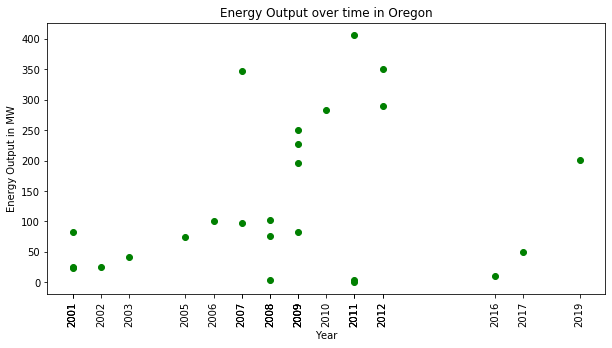

In [41]:
# scatter plot describing energy output over time in oregon

year = or_df.iloc[:,1]
energy_output = or_df.iloc[:,2]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, energy_output, color="green")
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Energy Output in MW")
plt.title("Energy Output over time in Oregon")
plt.show()

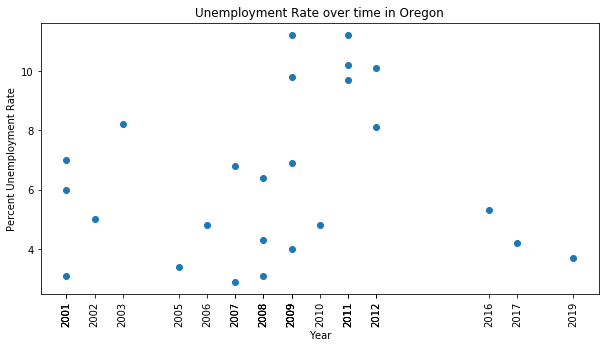

In [42]:
# scatter plot describing unemployment rate over time in oregon

year = or_df.iloc[:,1]
unemployment_rate = or_df.iloc[:,5]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, unemployment_rate)
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Percent Unemployment Rate")
plt.title("Unemployment Rate over time in Oregon")
plt.show()

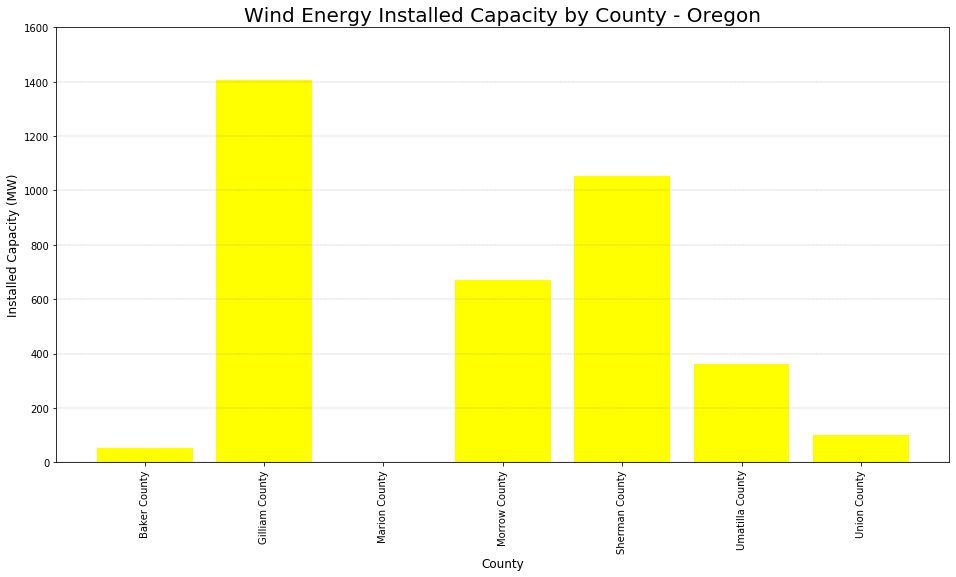

In [43]:
WF_OR = oregon_df.groupby('County')
WF_county_OR = WF_OR["WF Total MW"].sum()
x = WF_county_OR.index
y = WF_county_OR.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color = 'yellow')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Oregon',fontsize=20)
plt.ylim(0,1600)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Texas plot

In [46]:
texas_df = modern_WF_MW.loc[modern_WF_MW['State']=='TX']
texas_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
781,TX,Fisher County,Amadeus,2020.0,96,250.12,GE Wind,GE2.82-127,89.0,127.0,-100.56799,32.91327,False
942,TX,Scurry County,Amazon Wind Farm Texas,2017.0,110,253.00,GE Wind,GE2.3-116,80.0,116.0,-101.00261,32.87671,False
1205,TX,Lubbock County,American Windmill Museum,2005.0,1,0.66,Vestas,V47-0.66,50.0,47.0,-101.82389,33.58089,False
1206,TX,Kinney County,Anacacho,2012.0,55,99.00,Vestas,V100-1.8,80.0,100.0,-100.20351,29.18324,False
1280,TX,Denton County,Apogee Stadium Wind,2012.0,3,0.30,Northern Power Systems,NW100,37.0,21.0,-97.16100,33.20120,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60596,TX,Archer County,Windthorst-2,2014.0,28,64.40,Siemens,SWT-2.3-108,80.0,108.0,-98.50011,33.49516,False
60820,TX,Cooke County,Wolf Ridge,2008.0,75,112.50,GE Wind,GE1.5-82.5,80.0,82.5,-97.44919,33.73179,False
60947,TX,Pecos County,Woodward Mountain I,2001.0,125,82.50,Gamesa,G47-0.66,50.0,47.0,-102.47739,30.94780,False
61074,TX,Pecos County,Woodward Mountain II,2001.0,115,75.90,Gamesa,G47-0.66,50.0,47.0,-102.42529,30.94320,False


In [48]:
# eliminating unnecessary columns

current_tx_df = texas_df[["County", "Year", "WF Total MW", "Wind Farm Name"]]
current_tx_df

,County,Year,WF Total MW,Wind Farm Name
781,Fisher County,2020.0,250.12,Amadeus
942,Scurry County,2017.0,253.00,Amazon Wind Farm Texas
1205,Lubbock County,2005.0,0.66,American Windmill Museum
1206,Kinney County,2012.0,99.00,Anacacho
1280,Denton County,2012.0,0.30,Apogee Stadium Wind
...,...,...,...,...
60596,Archer County,2014.0,64.40,Windthorst-2
60820,Cooke County,2008.0,112.50,Wolf Ridge
60947,Pecos County,2001.0,82.50,Woodward Mountain I
61074,Pecos County,2001.0,75.90,Woodward Mountain II


In [54]:
# grouping by county and year to get total sum of MW per county per year (this will make graphing and correlation easier)

current_tx_df_grouped = current_tx_df.groupby(['County', 'Year']).sum()

current_tx_df_grouped = current_tx_df_grouped.reset_index()
current_tx_df_grouped

,County,Year,WF Total MW
0,Andrews County,2020.0,160.74
1,Archer County,2012.0,150.00
2,Archer County,2014.0,64.40
3,Armstrong County,2015.0,150.00
4,Bailey County,2018.0,148.35
...,...,...,...
169,Willacy County,2017.0,228.00
170,Willacy County,2020.0,139.80
171,Winkler County,2009.0,152.61
172,Young County,2012.0,225.00


In [55]:
# pull texas census

tx_census = census_df[census_df["State"] == "TX"]
tx_census

,State,County,Year,Population,Unemployment Rate
177,TX,Anderson County,2000,"55,062",4.1
178,TX,Andrews County,2000,"12,949",4.9
179,TX,Angelina County,2000,"80,270",4.8
180,TX,Aransas County,2000,"22,452",5.9
181,TX,Archer County,2000,"8,966",3.2
...,...,...,...,...,...
9256,TX,Wood County,2019,45539,3.7
9257,TX,Yoakum County,2019,8713,2.9
9258,TX,Young County,2019,18010,3.0
9259,TX,Zapata County,2019,14179,5.1


In [56]:
# merge texas df with census df - THIS IS OUR FINAL TEXAS DATAFRAME - WILL BE USED IN GRAPH ANALYSIS

tx_df = pd.merge(current_tx_df_grouped, tx_census, on=["County", "Year"], how="left")
tx_df = tx_df.dropna(subset=["Unemployment Rate"])
tx_df

,County,Year,WF Total MW,State,Population,Unemployment Rate
1,Archer County,2012.0,150.00,TX,8816,5.5
2,Archer County,2014.0,64.40,TX,8844,4.5
3,Armstrong County,2015.0,150.00,TX,1901,6.6
4,Bailey County,2018.0,148.35,TX,7015,4.4
5,Baylor County,2015.0,150.00,TX,3609,3.5
...,...,...,...,...,...,...
167,Wilbarger County,2019.0,183.75,TX,12769,3.6
168,Willacy County,2012.0,604.98,TX,22208,15.8
169,Willacy County,2017.0,228.00,TX,21508,11.0
171,Winkler County,2009.0,152.61,TX,"7,128",9.3


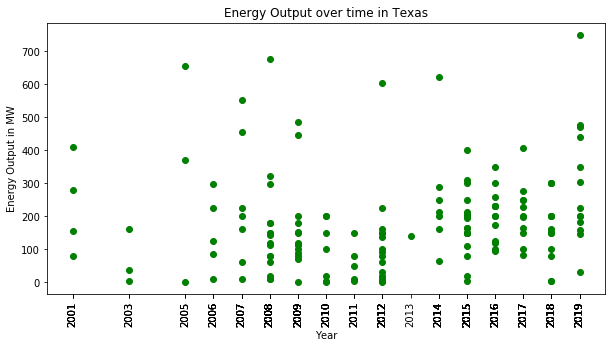

In [57]:
# scatter plot describing energy output over time in texas

year = tx_df.iloc[:,1]
energy_output = tx_df.iloc[:,2]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, energy_output, color="green")
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Energy Output in MW")
plt.title("Energy Output over time in Texas")
plt.show()

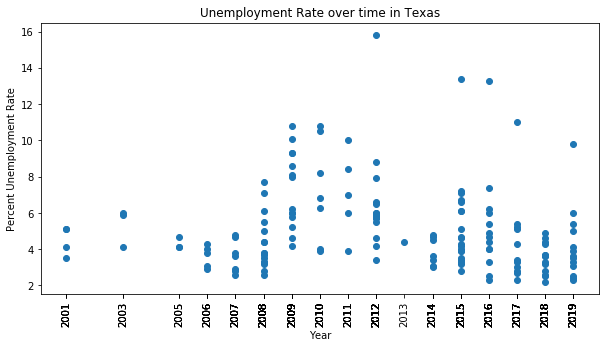

In [58]:
# scatter plot describing unemployment rate over time in texas

year = tx_df.iloc[:,1]
unemployment_rate = tx_df.iloc[:,5]  
plt.subplots(figsize=(10, 5))
plt.scatter(year, unemployment_rate)
plt.xticks(year, rotation=90) 
plt.xlabel("Year")
plt.ylabel("Percent Unemployment Rate")
plt.title("Unemployment Rate over time in Texas")
plt.show()

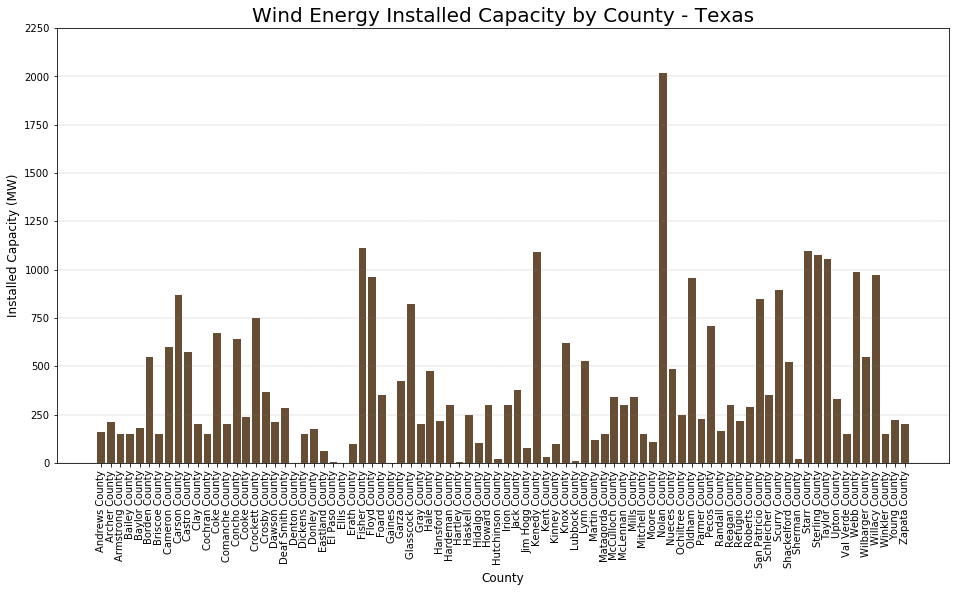

In [59]:
WF_TX = texas_df.groupby('County')
WF_county_TX = WF_TX["WF Total MW"].sum()
x = WF_county_TX.index
y = WF_county_TX.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color = (0.4, 0.3, 0.2))
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Texas',fontsize=20)
plt.ylim(0,2250)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

In [35]:
base_url = 'http://api.eia.gov/series/?'

In [52]:
# creates empty series
coal_prod = []
oil_prod = []
geothermal_prod = []
hydropower_prod = []
naturalgasdry_prod = []
naturalgasliquid_prod = []
nuclear_prod = []
solar_prod = []
biomass_prod = []
wind_prod = []
fossilfuel_prod = []
renewable_prod = []
coal_x = []
coal_y = []
oil_x = []
oil_y = []
geothermal_x =[]
geothermal_y =[]
hydropower_x =[]
hydropower_y =[]
naturalgasdry_x =[]
naturalgasdry_y =[]
naturalgasliquid_x =[]
naturalgasliquid_y =[]
nuclear_x =[]
nuclear_y =[]
solar_x =[]
solar_y =[]
biomass_x =[]
biomass_y =[]
wind_x =[]
wind_y =[]
fossilfuel_x =[]
fossilfuel_y =[]
renewable_x = []
renewable_y = []
CO2total_x = []
CO2total_y = []
CO2total = []

# US Enenery Information Administration (EIA) API

# Get energy production generated by coal in the USA
series_name = 'TOTAL.CLPRBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
coal_response = requests.get(query_url).json()
coal_prod.append(coal_response['series'][0]['data'])
coal_prod = coal_prod[0]
for i in reversed (coal_prod):
    coal_x.append(i[0])
    coal_y.append(i[1])

# Get energy production generated by oil in the USA
series_name = 'TOTAL.PAPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
oil_response = requests.get(query_url).json()
oil_prod.append(oil_response['series'][0]['data'])
oil_prod = oil_prod[0]
for i in reversed (oil_prod):
    oil_x.append(i[0]) 
    oil_y.append(i[1])

# Get energy production generated by geothermal in the USA
series_name = 'TOTAL.GETCBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
geothermal_response = requests.get(query_url).json()
geothermal_prod.append(geothermal_response['series'][0]['data'])
geothermal_prod = geothermal_prod[0]
for i in reversed (geothermal_prod):
    geothermal_x.append(i[0]) 
    geothermal_y.append(i[1])

# Get energy production generated by hydro in the USA
series_name = 'TOTAL.HVTCBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
hydropower_response = requests.get(query_url).json()
hydropower_prod.append(hydropower_response['series'][0]['data'])
hydropower_prod = hydropower_prod[0]
for i in reversed (hydropower_prod):
    hydropower_x.append(i[0]) 
    hydropower_y.append(i[1])

# Get energy production generated by dry natural gas in the USA
series_name = 'TOTAL.NGPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
naturalgasdry_response = requests.get(query_url).json()
naturalgasdry_prod.append(naturalgasdry_response['series'][0]['data'])
naturalgasdry_prod = naturalgasdry_prod[0]
for i in reversed (naturalgasdry_prod):
    naturalgasdry_x.append(i[0]) 
    naturalgasdry_y.append(i[1])

# Get energy production generated by liquid natural gas in the USA
series_name = 'TOTAL.NLPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
naturalgasliquid_response = requests.get(query_url).json()
naturalgasliquid_prod.append(naturalgasliquid_response['series'][0]['data'])
naturalgasliquid_prod = naturalgasliquid_prod[0]
for i in reversed (naturalgasliquid_prod):
    naturalgasliquid_x.append(i[0]) 
    naturalgasliquid_y.append(i[1])

# Get energy production generated by nuclear in the USA
series_name = 'TOTAL.NUETBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
nuclear_response = requests.get(query_url).json()
nuclear_prod.append(nuclear_response['series'][0]['data'])
nuclear_prod = nuclear_prod[0]
for i in reversed (nuclear_prod):
    nuclear_x.append(i[0]) 
    nuclear_y.append(i[1])

# Get energy production generated by solar in the USA
series_name = 'TOTAL.SOTCBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
solar_response = requests.get(query_url).json()
solar_prod.append(solar_response['series'][0]['data'])
solar_prod = solar_prod[0]
for i in reversed (solar_prod):
    solar_x.append(i[0]) 
    solar_y.append(i[1])
    
# Get energy production generated by biomass in the USA
series_name = 'TOTAL.BMPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
biomass_response = requests.get(query_url).json()
biomass_prod.append(biomass_response['series'][0]['data'])
biomass_prod = biomass_prod[0]
for i in reversed (biomass_prod):
    biomass_x.append(i[0]) 
    biomass_y.append(i[1])

# Get energy production generated by wind in the USA
series_name = 'TOTAL.WYTCBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
wind_response = requests.get(query_url).json()
wind_prod.append(wind_response['series'][0]['data'])
wind_prod = wind_prod[0]
for i in reversed (wind_prod):
    wind_x.append(i[0]) 
    wind_y.append(i[1])
    
# Get energy production generated by all fossil sources in the USA
series_name = 'TOTAL.FFPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
fossilfuel_response = requests.get(query_url).json()
fossilfuel_prod.append(fossilfuel_response['series'][0]['data'])
fossilfuel_prod = fossilfuel_prod[0]
for i in reversed (fossilfuel_prod):
    fossilfuel_x.append(i[0]) 
    fossilfuel_y.append(i[1])

# Get energy production generated by all renewable sources in the USA
series_name = 'TOTAL.REPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
renewable_response = requests.get(query_url).json()
renewable_prod.append(renewable_response['series'][0]['data'])
renewable_prod = renewable_prod[0]
for i in reversed (renewable_prod):
    renewable_x.append(i[0]) 
    renewable_y.append(i[1])

# Get CO2 emission in the USA

series_name = 'STEO.TETCCO2.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
CO2_response = requests.get(query_url).json()
CO2total.append(CO2_response['series'][0]['data'])
CO2total = CO2total[0]
for i in reversed (CO2total):
    CO2total_x.append(i[0]) 
    CO2total_y.append(i[1])


# Add sources to dataframe
coal_source = pd.DataFrame(coal_x)
coal_source.set_axis(['Year'], axis='columns', inplace=True)
coal_source['Coal'] = coal_y

oil_source = pd.DataFrame(oil_x)
oil_source.set_axis(['Year'], axis='columns', inplace=True)
oil_source['Oil'] = oil_y

source_df = pd.merge(coal_source,oil_source,on="Year", how="outer")

geothermal_source = pd.DataFrame(geothermal_x)
geothermal_source.set_axis(['Year'], axis='columns', inplace=True)
geothermal_source['Geothermal'] = geothermal_y
source_df = pd.merge(source_df,geothermal_source,on="Year", how="outer")

wind_source = pd.DataFrame(wind_x)
wind_source.set_axis(['Year'], axis='columns', inplace=True)
wind_source['Wind'] = wind_y
source_df = pd.merge(source_df,wind_source,on="Year", how="outer")

hydropower_source = pd.DataFrame(hydropower_x)
hydropower_source.set_axis(['Year'], axis='columns', inplace=True)
hydropower_source['Hydropower'] = hydropower_y
source_df = pd.merge(source_df,hydropower_source,on="Year", how="outer")

naturalgasdry_source = pd.DataFrame(naturalgasdry_x)
naturalgasdry_source.set_axis(['Year'], axis='columns', inplace=True)
naturalgasdry_source['Natural Gas Dry'] = naturalgasdry_y
source_df = pd.merge(source_df,naturalgasdry_source,on="Year", how="outer")

naturalgasliquid_source = pd.DataFrame(naturalgasliquid_x)
naturalgasliquid_source.set_axis(['Year'], axis='columns', inplace=True)
naturalgasliquid_source['Natural Gas Liquid'] = naturalgasliquid_y
source_df = pd.merge(source_df,naturalgasliquid_source,on="Year", how="outer")

nuclear_source = pd.DataFrame(nuclear_x)
nuclear_source.set_axis(['Year'], axis='columns', inplace=True)
nuclear_source['Nuclear'] = nuclear_y
source_df = pd.merge(source_df,nuclear_source,on="Year", how="outer")

solar_source = pd.DataFrame(solar_x)
solar_source.set_axis(['Year'], axis='columns', inplace=True)
solar_source['Solar'] = solar_y
source_df = pd.merge(source_df,solar_source,on="Year", how="outer")

biomass_source = pd.DataFrame(biomass_x)
biomass_source.set_axis(['Year'], axis='columns', inplace=True)
biomass_source['Biomass'] = biomass_y
source_df = pd.merge(source_df,biomass_source,on="Year", how="outer")

# Add source categories to dataframe
fossilfuel_source = pd.DataFrame(fossilfuel_x)
fossilfuel_source.set_axis(['Year'], axis='columns', inplace=True)
fossilfuel_source['Fossil Fuel'] = fossilfuel_y

main_sources = pd.DataFrame(renewable_x)
main_sources.set_axis(['Year'], axis='columns', inplace=True)
main_sources['Renewable'] = renewable_y

main_sources = pd.merge(main_sources,nuclear_source,on="Year", how="outer")
main_sources = pd.merge(main_sources,fossilfuel_source,on="Year", how="outer")


#CO2 data frame
CO2_df = pd.DataFrame(CO2total_x)
CO2_df.set_axis(['Year'], axis='columns', inplace=True)
CO2_df['CO2 Total'] = CO2total_y

source_df['Year'] = source_df['Year'].astype(int)
main_sources['Year'] = main_sources['Year'].astype(int)
CO2_df['Year'] = CO2_df['Year'].astype(int)
source = source_df.loc[source_df['Year'] >= 2000,:]
main_sources = main_sources.loc[main_sources['Year'] >= 2000,:]
CO2_df = CO2_df.loc[(CO2_df['Year'] >= 2000) & (CO2_df['Year'] < 2021),:]

CO2_df

,Year,CO2 Total
10,2000,5861.952305
11,2001,5760.365764
12,2002,5801.794243
13,2003,5851.849982
14,2004,5971.305802
15,2005,5991.352987
16,2006,5910.781068
17,2007,6001.147864
18,2008,5817.342250
19,2009,5392.702818


# Plots

In [60]:
year = source['Year']
plt.subplots(figsize=(16, 8))
coal_handle, = plt.plot(year, source['Coal'], color=(0.4, 0.3, 0.2), label="Coal")
oil_handle, = plt.plot(year, source['Oil'], color='red', label="Oil")
geothermal_handle, = plt.plot(year, source['Geothermal'], color=(0.5, 0.4, 1.0), label="Geothermal")
wind_handle, = plt.plot(year, source['Wind'], color='cyan', label="Wind")
hydropower_handle, = plt.plot(year, source['Hydropower'], color='green', label="Hydropower")
naturalgasdry_handle, = plt.plot(year, source['Natural Gas Dry'], color=(0.6, 0.15, 0.4), label="Natural Gas Dry")
naturalgasliquid_handle, = plt.plot(year, source['Natural Gas Liquid'], color=(0.6, 0.35, 0.25), label="Natural Gas Liquid")
nuclear_handle, = plt.plot(year, source['Nuclear'], color='orange', label="Nuclear")
biomass_handle, = plt.plot(year, source['Biomass'], color='blue', label="Biomass")
plt.xticks(range(2000,2021))
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Energy Production Trillion Btu',fontsize=12)
plt.title('Energy Production per Source in the USA',fontsize=20)
plt.legend(loc="best")

plt.xticks(rotation = 90)
plt.show()



co2 = CO2_df['CO2 Total']
year = source['Year']
plt.subplots(figsize=(16, 8))
plt.plot(year, co2, color='green')
plt.xticks(range(2000,2021))
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.xlabel('Year',fontsize=12)
plt.ylabel('CO2 Emission (Million Metric Tons)',fontsize=12)
plt.title('CO2 Emission in the USA',fontsize=20)
plt.legend(loc="best")

plt.xticks(rotation = 90)
plt.show()

NameError: name 'source' is not defined

# Pie chart with production by source (nuclear, fossil fuel and renewables) 

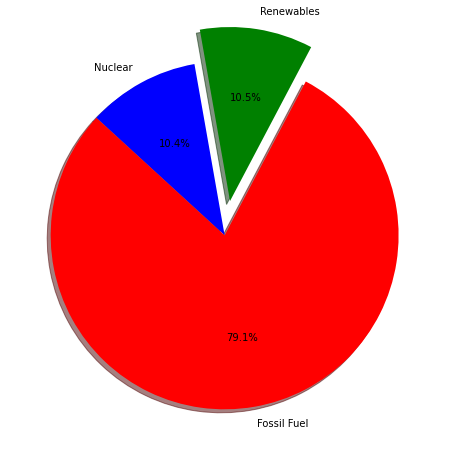

In [54]:
# Labels for the sections of our pie chart
labels = ["Nuclear", "Fossil Fuel", "Renewables"]

nuclear = main_sources['Nuclear'].sum()
fossil_fuel = main_sources['Fossil Fuel'].sum()
renewable = main_sources['Renewable'].sum()

# The values of each section of the pie chart
sizes = [nuclear, fossil_fuel, renewable]

# The colors of each section of the pie chart
colors = ["blue", "red", "green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0.2)
plt.subplots(figsize=(16, 8))
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes,explode=explode,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=100)

plt.show()

# Correlation fossil fuel x renewable

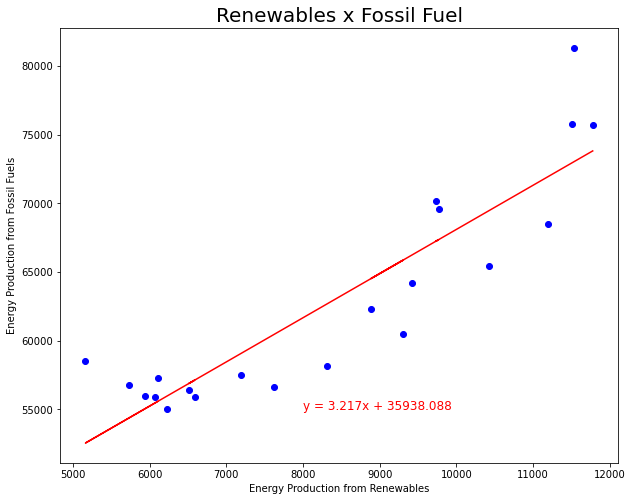

The r-squared is: 0.8019


In [69]:
# Calculate the correlation coefficient and linear regression model 
# for 
regress_values=[]
renewable = main_sources['Renewable']
fossil =  main_sources['Fossil Fuel']


plt.subplots(figsize=(10, 8))
(slope, intercept, rvalue, pvalue, stderr) = linregress(renewable, fossil)
regress_values = np.asarray(renewable) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(renewable, fossil,  color = 'blue')
plt.plot(renewable,regress_values,"r-")

plt.annotate(line_eq,(8000, 55000),fontsize=12,color="red")
plt.xlabel('Energy Production from Renewables')
plt.ylabel('Energy Production from Fossil Fuels')
plt.title('Renewables x Fossil Fuel',fontsize=20)
plt.show()
print(f"The r-squared is: {round(rvalue**2,4)}")

